### Dataset From in this link 


https://archive.ics.uci.edu/ml/datasets/Epileptic+Seizure+Recognition

![](https://ars.els-cdn.com/content/image/1-s2.0-S001048251830132X-fx1.jpg)

In [99]:
import matplotlib.pyplot as plt
import pandas as pd
from keras.models import Sequential
from tensorflow.keras.optimizers import Adam
from keras import layers
from keras import regularizers
import os
import keras
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping
import keras.backend as K

import numpy as np

from keras.callbacks import LearningRateScheduler

sns.set(rc={'figure.figsize': [7, 7]}, font_scale=1.2)

In [67]:
df = pd.read_csv("../input/epileptic-seizure-recognition/Epileptic Seizure Recognition.csv", header=0, index_col=0)
df1 = df.drop(["y"], axis=1)
lbls = df["y"].values - 1

In [69]:
df.head()

,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,...,X170,X171,X172,X173,X174,X175,X176,X177,X178,y
Unnamed,,,,,,,,,,,,,,,,,,,,,
X21.V1.791,135,190,229,223,192,125,55,-9,-33,-38,...,-17,-15,-31,-77,-103,-127,-116,-83,-51,4
X15.V1.924,386,382,356,331,320,315,307,272,244,232,...,164,150,146,152,157,156,154,143,129,1
X8.V1.1,-32,-39,-47,-37,-32,-36,-57,-73,-85,-94,...,57,64,48,19,-12,-30,-35,-35,-36,5
X16.V1.60,-105,-101,-96,-92,-89,-95,-102,-100,-87,-79,...,-82,-81,-80,-77,-85,-77,-72,-69,-65,5
X20.V1.54,-9,-65,-98,-102,-78,-48,-16,0,-21,-59,...,4,2,-12,-32,-41,-65,-83,-89,-73,5


In [70]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 11500 entries, X21.V1.791 to X16.V1.210
Columns: 179 entries, X1 to y
dtypes: int64(179)
memory usage: 15.8+ MB


In [71]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
X1,11500.0,-11.581391,165.626284,-1839.0,-54.0,-8.0,34.0,1726.0
X2,11500.0,-10.911565,166.059609,-1838.0,-55.0,-8.0,35.0,1713.0
X3,11500.0,-10.187130,163.524317,-1835.0,-54.0,-7.0,36.0,1697.0
X4,11500.0,-9.143043,161.269041,-1845.0,-54.0,-8.0,36.0,1612.0
X5,11500.0,-8.009739,160.998007,-1791.0,-54.0,-8.0,35.0,1518.0
...,...,...,...,...,...,...,...,...
X175,11500.0,-13.045043,164.241019,-1863.0,-56.0,-9.0,34.0,1958.0
X176,11500.0,-12.705130,162.895832,-1781.0,-55.0,-9.0,34.0,2047.0
X177,11500.0,-12.426000,162.886311,-1727.0,-55.0,-9.0,34.0,2047.0
X178,11500.0,-12.195652,164.852015,-1829.0,-55.0,-9.0,34.0,1915.0


In [72]:
wave = np.zeros((11500, 178))

z = 0
for index, row in df1.iterrows():
    wave[z, :] = row
    z+=1

mean = wave.mean(axis=0)
wave -= mean
std = wave.std(axis=0)
wave /= std


In [95]:
wave.shape

(11500, 178, 1)

In [73]:
def one_hot(y):
    lbl = np.zeros(5)
    lbl[y] = 1
    return lbl

target = []
for value in lbls:
    target.append(one_hot(value))
target = np.array(target)
wave = np.expand_dims(wave, axis=-1)

In [ ]:
model = Sequential()
model.add(Dense(256, input_shape=[x.shape[1]], activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.3))
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(32, activation='relu'))
model.add(Dropout(0.4))
model.add(Dense(32, activation='relu'))
model.add(Dropout(0.3))
model.add(Dense(1, activation='sigmoid'))

In [129]:
model = Sequential()
model.add(layers.Conv1D(256, 15, strides=2,input_shape=(178, 1), use_bias=False))
model.add(layers.ReLU())
model.add(layers.Conv1D(128, 3))
model.add(layers.Conv1D(64, 3, strides=2))
model.add(layers.Conv1D(64, 3, strides=2))
model.add(layers.BatchNormalization())
model.add(layers.Dropout(0.5))
model.add(layers.Conv1D(64, 3))
model.add(layers.BatchNormalization())
model.add(layers.Conv1D(64, 3, strides=2))
model.add(layers.BatchNormalization())
model.add(layers.LSTM(265, dropout=0.5, return_sequences=True))
model.add(layers.LSTM(128, dropout=0.5, return_sequences=True))
model.add(layers.LSTM(64, dropout=0.5, return_sequences=True))
model.add(layers.LSTM(64, dropout=0.5, return_sequences=True))
model.add(layers.LSTM(32))
model.add(layers.Dropout(0.5))
model.add(layers.Dense(5, activation="softmax"))


In [130]:
model.summary()

Model: "sequential_7"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_36 (Conv1D)           (None, 82, 256)           3840      
_________________________________________________________________
re_lu_7 (ReLU)               (None, 82, 256)           0         
_________________________________________________________________
conv1d_37 (Conv1D)           (None, 80, 128)           98432     
_________________________________________________________________
conv1d_38 (Conv1D)           (None, 39, 64)            24640     
_________________________________________________________________
conv1d_39 (Conv1D)           (None, 19, 64)            12352     
_________________________________________________________________
batch_normalization_14 (Batc (None, 19, 64)            256       
_________________________________________________________________
dropout_14 (Dropout)         (None, 19, 64)           

In [131]:
model.compile(optimizer=Adam(), loss='categorical_crossentropy', metrics=['acc'])

In [132]:

lrd = ReduceLROnPlateau(monitor = 'val_loss',patience = 200,verbose = 1,factor = 0.30, min_lr = 1e-10)
 
mcp = ModelCheckpoint('model.h5')

es = EarlyStopping(verbose=1, patience=20)


In [133]:
history = model.fit(wave, target, epochs=100, batch_size=441, validation_split=0.1,verbose=1, callbacks=[lrs,mcp,es])

Epoch 1/100
24/24 [==============================] - 21s 527ms/step - loss: 1.4619 - acc: 0.3550 - val_loss: 3.1230 - val_acc: 0.2087
Epoch 2/100
24/24 [==============================] - 11s 442ms/step - loss: 1.2471 - acc: 0.4018 - val_loss: 2.0771 - val_acc: 0.2791
Epoch 3/100
24/24 [==============================] - 10s 430ms/step - loss: 1.0534 - acc: 0.5306 - val_loss: 1.5488 - val_acc: 0.4043
Epoch 4/100
24/24 [==============================] - 10s 434ms/step - loss: 0.9653 - acc: 0.5629 - val_loss: 1.6156 - val_acc: 0.4139
Epoch 5/100
24/24 [==============================] - 10s 430ms/step - loss: 0.8584 - acc: 0.6141 - val_loss: 0.9774 - val_acc: 0.5722
Epoch 6/100
24/24 [==============================] - 11s 444ms/step - loss: 0.8246 - acc: 0.6283 - val_loss: 0.8352 - val_acc: 0.6191
Epoch 7/100
24/24 [==============================] - 10s 430ms/step - loss: 0.8025 - acc: 0.6307 - val_loss: 0.9560 - val_acc: 0.5417
Epoch 8/100
24/24 [==============================] - 10s 431ms

Epoch 62/100
24/24 [==============================] - 10s 434ms/step - loss: 0.6433 - acc: 0.6822 - val_loss: 0.6722 - val_acc: 0.7078
Epoch 63/100
24/24 [==============================] - 10s 435ms/step - loss: 0.6295 - acc: 0.6991 - val_loss: 0.6199 - val_acc: 0.7157
Epoch 64/100
24/24 [==============================] - 11s 442ms/step - loss: 0.6237 - acc: 0.6867 - val_loss: 0.6264 - val_acc: 0.7209
Epoch 65/100
24/24 [==============================] - 10s 433ms/step - loss: 0.6118 - acc: 0.7047 - val_loss: 0.6367 - val_acc: 0.7078
Epoch 66/100
24/24 [==============================] - 10s 429ms/step - loss: 0.6115 - acc: 0.7006 - val_loss: 0.6571 - val_acc: 0.7217
Epoch 67/100
24/24 [==============================] - 10s 436ms/step - loss: 0.6271 - acc: 0.6867 - val_loss: 0.6317 - val_acc: 0.7043
Epoch 68/100
24/24 [==============================] - 10s 430ms/step - loss: 0.6290 - acc: 0.6987 - val_loss: 0.6318 - val_acc: 0.6948
Epoch 69/100
24/24 [==============================] - 1

In [134]:
print(history.history.keys())

dict_keys(['loss', 'acc', 'val_loss', 'val_acc', 'lr'])


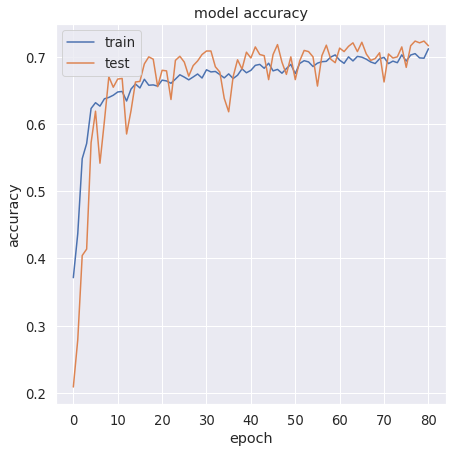

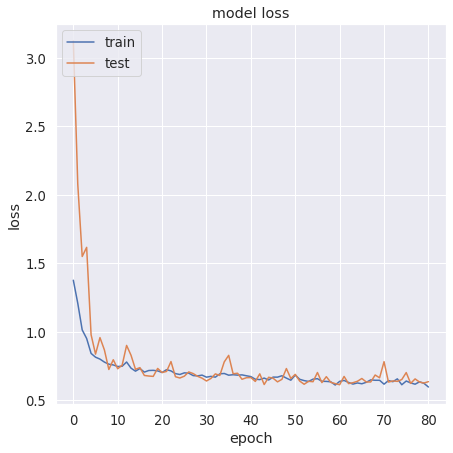

In [135]:
# summarize history for accuracy
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()